## Tutorial-Week 2 for COMP309
*1. How to Create/Run a Jupyter Notebook* 

   * If you are using lab computer in ECS, find "Jupyter Notebook" pre-installed or start it by entering jupyter notebook in command line. 
   * If you are using you own laptop
       *  instal all the needed packages  individually for python can be a bit difficult, we recommend Anacond (https://www.anaconda.com/products/distribution) 
       * Open "Anaconda-Navigator" and then selecting "Jupyter Notebook". Or you can also start it from the Anaconda Prompt command line: jupyter notebook 
       * Jupyter notebook is a programming environment that runs in a web browser. need a reasonably up-to-date browser, Chrome/Firefox should work
       * If you see a new browser output with the label "Jupyter" on the left top of the screen, you have already opened the notebook successfully.

*2. Random Seed, and random splitting to form a traning set and a test set*

*3. Review of Classification Models and Algorithms-using Scikit-learn (https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)*

   * [ ] K Nearest Neighbours
   * [ ] Perceptron and Multilayer Perceptron
   * [ ] Naive Bayes Classifier
   * [ ] Support Vector Machine
   * [ ] Decision Tree
   * [ ] Boosting
   * [ ] Random Forests
   


In [34]:
#import the 
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
#data # this is like a dict so far, not a dataframe...

x = iris.data
labels =  iris.target
x.shape
# x
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
#Random number generator need a seed
#supply a specific seed to the random generator,
#you will get the same numbers every time you execute a program
import random

random.seed(130)
print(random.random())



0.5197779418935203


In [70]:
import numpy.random as rng # random number generator

print(rng.random())
#random_state simply sets a seed to the random generato
rn = rng.RandomState(20)
print(rn.random())



0.8316158054852849
0.5881308010772742


In [52]:
from sklearn.model_selection import train_test_split

ta_x, te_x, ta_y, te_y = train_test_split(x, labels, test_size=0.3, random_state=309,shuffle=True)
ta_x.shape
ta_x[:5]
#ta_y.shape

array([[5. , 2.3, 3.3, 1. ],
       [4.9, 3.1, 1.5, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.2, 2.9, 4.3, 1.3]])

In [7]:
te_x.shape
#te_x
#te_y.shape

(45, 4)

In [8]:
#KNN, setting k - "n_neighbors" 
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)#, weights="distance")# by default-"uniform"
neigh.fit(ta_x, ta_y)
pre_y = neigh.predict(te_x[0:1])
print("Predictions:"+str(pre_y))
#print("Labels     :"+str(te_y))
#neigh.predict(te_x[20:30])
#neigh.predict_proba(te_x[20:30])

Predictions:[0]


In [9]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=0.5)
logreg.fit(ta_x, ta_y)
logreg.coef_


array([[-0.39007941,  0.67583768, -1.83035456, -0.73783521],
       [ 0.28011339, -0.42344897, -0.10609608, -0.54572796],
       [ 0.10996602, -0.25238872,  1.93645064,  1.28356318]])

In [10]:
logreg = LogisticRegression(C=0.3)
logreg.fit(ta_x, ta_y)
logreg.coef_

array([[-0.35847397,  0.53398199, -1.54062167, -0.61441525],
       [ 0.16995085, -0.42594791, -0.02855264, -0.40508516],
       [ 0.18852312, -0.10803408,  1.56917432,  1.01950041]])

In [11]:
logreg = LogisticRegression(C=1, max_iter=120)
logreg.fit(ta_x, ta_y)
logreg.coef_
logreg_pre_y = logreg.predict(te_x[0:5])
print("Predictions:"+str(logreg_pre_y))
print("Labels     :"+str(te_y[0:5]))

Predictions:[0 2 0 1 2]
Labels     :[0 1 0 1 2]


In [12]:
logreg.predict_proba(te_x[0:5])

array([[9.34095858e-01, 6.59037571e-02, 3.84481258e-07],
       [1.16505174e-03, 4.61086364e-01, 5.37748584e-01],
       [9.70798938e-01, 2.92009603e-02, 1.01438382e-07],
       [4.23626011e-03, 7.84525506e-01, 2.11238233e-01],
       [1.54392056e-04, 1.95781979e-01, 8.04063629e-01]])

In [13]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)#The stopping criterion, the iterations will stop when loss > previous_loss - tol.
clf.fit(ta_x, ta_y)
clf_pre_y = clf.predict(te_x[0:5])
print("Predictions:"+str(clf_pre_y))
print("Labels     :"+str(te_y[0:5]))

Predictions:[0 2 0 1 2]
Labels     :[0 1 0 1 2]


In [28]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0, max_iter=900,alpha=0.1, activation="logistic")#float value, default=0.0001
mlp_clf.fit(ta_x, ta_y)
mlp_clf.predict(te_x[0:5])
#mlp_clf.coefs_
mlp_clf.n_layers_

3

In [20]:
mlp_clf.predict_proba(te_x)

array([[9.01946450e-01, 9.80231072e-02, 3.04428631e-05],
       [9.15998756e-03, 4.96222655e-01, 4.94617358e-01],
       [9.60889972e-01, 3.91053748e-02, 4.65314645e-06],
       [1.92391162e-02, 6.64316966e-01, 3.16443917e-01],
       [1.98991031e-03, 2.53338986e-01, 7.44671104e-01],
       [9.14155669e-01, 8.58184602e-02, 2.58708323e-05],
       [9.46180652e-01, 5.38092219e-02, 1.01259625e-05],
       [9.51699503e-01, 4.82939418e-02, 6.55571865e-06],
       [7.01737013e-02, 8.06700746e-01, 1.23125553e-01],
       [9.12829674e-01, 8.71444756e-02, 2.58499026e-05],
       [4.82150149e-02, 8.03881107e-01, 1.47903878e-01],
       [1.88533898e-02, 6.59040471e-01, 3.22106139e-01],
       [4.07299434e-02, 7.59548211e-01, 1.99721845e-01],
       [6.73165395e-04, 1.27410161e-01, 8.71916673e-01],
       [8.35290263e-01, 1.64616154e-01, 9.35827697e-05],
       [6.83794055e-02, 8.35705907e-01, 9.59146875e-02],
       [9.80036378e-01, 1.99625977e-02, 1.02388670e-06],
       [9.80072184e-01, 1.99266

In [21]:
from sklearn.naive_bayes import MultinomialNB

rn = rng.RandomState(1)
x = rn.randint(5, size=(20, 3))#generate some random int values, discrete features 
print(x)
y = np.array([1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2])
nb_clf = MultinomialNB(alpha=1) #alpha - smoothing parameter =1
nb_clf.fit(x, y)
print(nb_clf.predict(x[0:5]))


[[3 4 0]
 [1 3 0]
 [0 1 4]
 [4 1 2]
 [4 2 4]
 [3 4 2]
 [4 2 4]
 [1 1 0]
 [1 1 1]
 [1 0 4]
 [1 0 0]
 [3 2 1]
 [0 3 1]
 [1 3 4]
 [0 1 3]
 [4 2 4]
 [0 3 1]
 [2 0 4]
 [1 2 2]
 [1 0 1]]
[1 2 1 1 1]


In [22]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', C=0.03)#"linear", "poly",  C:Regularization parameter
svm_clf.fit(ta_x, ta_y)
svm_clf.predict(te_x[0:5])
#SVC for multiclass classifcation: decision_function_shape "one-over-rest", “one-versus-one”
#OVO-breaks down the multiclass problem into multiple binary classification problems
#OVR-a binary classifier per each class #default


array([0, 2, 0, 2, 2])

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=1, random_state=0)#possible random at each split before finding the best split among them
dt_clf.fit(ta_x, ta_y)
print(dt_clf.predict(te_x[0:5]))

[0 2 0 2 2]


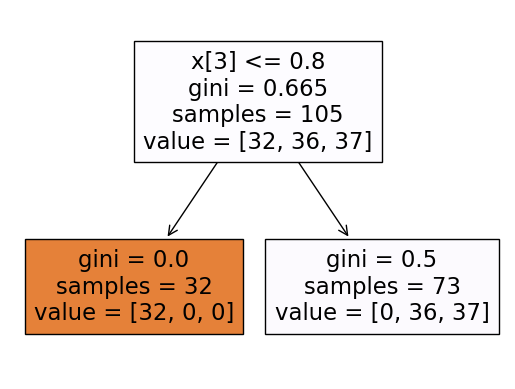

In [24]:
from sklearn.tree import plot_tree
plot_tree(dt_clf, filled=True)
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)
gb_clf.fit(ta_x, ta_y)
gb_clf.predict(te_x[0:5])

array([0, 2, 0, 1, 2])

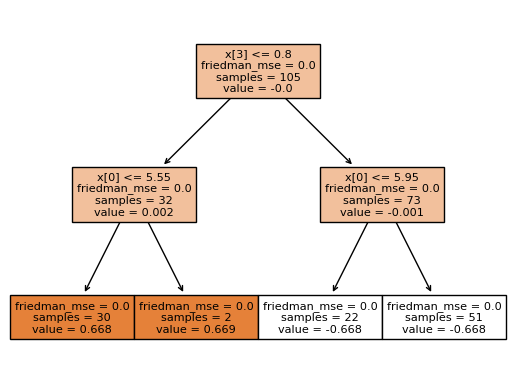

In [26]:
sub_tree_50 = gb_clf.estimators_[50, 0]
plot_tree(sub_tree_50, filled=True)
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=33)
rf_clf.fit(ta_x, ta_y)
pre_y = rf_clf.predict(te_x)
print("prediction     :"+str(pre_y))
print("Labels     :"+str(te_y))


prediction     :[0 2 0 1 2 0 0 0 1 0 1 1 1 2 0 1 0 0 2 0 0 2 0 1 0 2 1 2 2 0 2 0 2 1 0 2 2
 0 2 2 2 1 1 0 1]
Labels     :[0 1 0 1 2 0 0 0 1 0 1 1 1 2 0 1 0 0 2 0 0 1 0 1 0 2 1 2 2 0 2 0 2 1 0 2 2
 0 2 2 2 1 1 0 1]
